<a href="https://colab.research.google.com/github/georgesamvel01/Amazon-Prime-video-Data-Anaytics/blob/main/Restarunt_Analysis_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-16-895595270.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


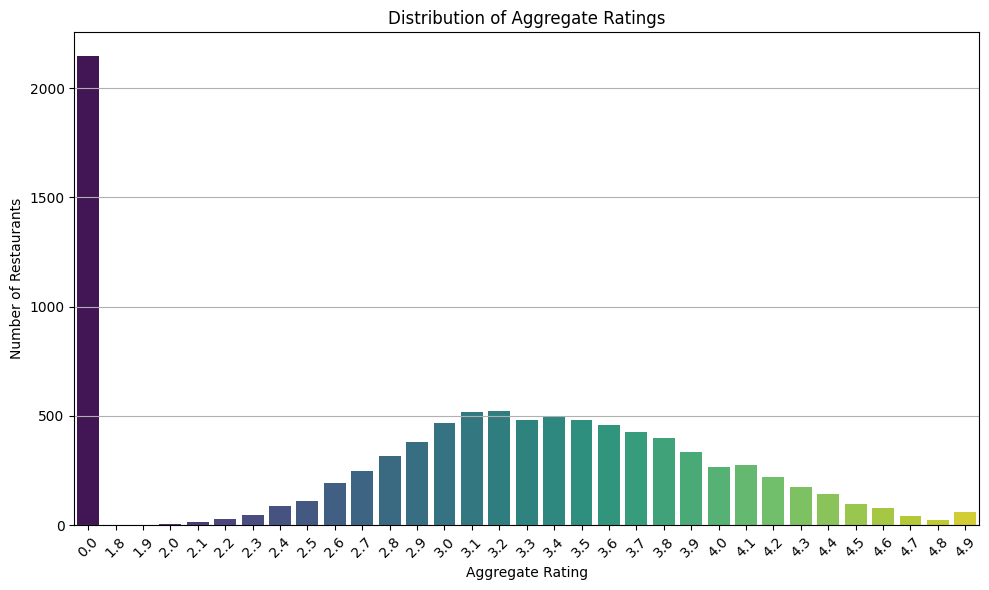

 Most Common Rating: 0.0
 Average Number of Votes: 156.91


In [ ]:
#tASK1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Dataset .csv")
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

ratings_df = df[['Aggregate rating', 'Votes']].dropna()

rating_counts = ratings_df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

most_common_rating = rating_counts.idxmax()
print(f" Most Common Rating: {most_common_rating}")

average_votes = ratings_df['Votes'].mean()
print(f" Average Number of Votes: {average_votes:.2f}")


/tmp/ipython-input-14-135803977.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_combinations.index, x=top_combinations.values, palette="coolwarm")


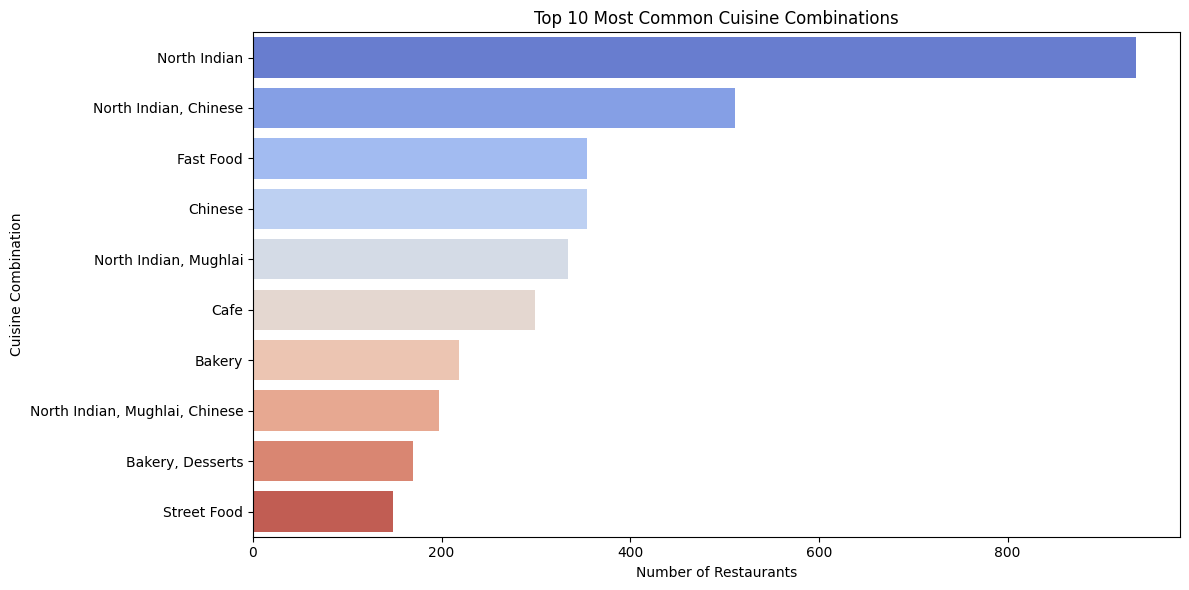

/tmp/ipython-input-14-135803977.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_cuisine_rating.values, y=popular_cuisine_rating.index, palette="crest")


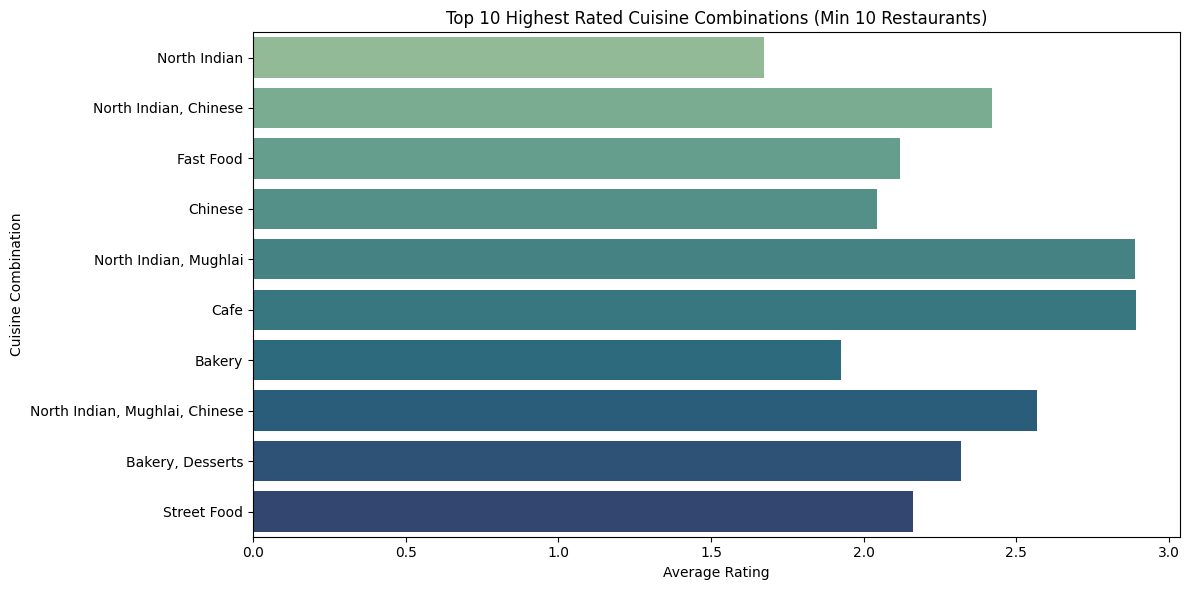

In [ ]:
#tASK 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset .csv")


df['Cuisines'] = df['Cuisines'].astype(str).str.strip()
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


top_combinations = df['Cuisines'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(y=top_combinations.index, x=top_combinations.values, palette="coolwarm")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()


cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)


valid_combos = df['Cuisines'].value_counts()
popular_cuisine_rating = cuisine_rating[valid_combos[valid_combos > 10].index].head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=popular_cuisine_rating.values, y=popular_cuisine_rating.index, palette="crest")
plt.title("Top 10 Highest Rated Cuisine Combinations (Min 10 Restaurants)")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()


In [ ]:
#Task3

import pandas as pd
import folium
from folium.plugins import MarkerCluster

df = pd.read_csv("Dataset .csv")


df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')


geo_df = df.dropna(subset=['Latitude', 'Longitude'])


map_center = [geo_df['Latitude'].mean(), geo_df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)


marker_cluster = MarkerCluster().add_to(restaurant_map)


for idx, row in geo_df.iterrows():
    popup_info = f"{row['Restaurant Name']}<br>Rating: {row['Aggregate rating']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_info,
        icon=folium.Icon(color='green' if row['Aggregate rating'] >= 4 else 'red')
    ).add_to(marker_cluster)


restaurant_map.save("restaurant_cluster_map.html")
print(" Map saved as 'restaurant_cluster_map.html'. You can open it in your browser.")


✅ Map saved as 'restaurant_cluster_map.html'. You can open it in your browser.


In [ ]:
from google.colab import files
files.download("restaurant_cluster_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-13-1609638590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains['Total Votes'], y=top_chains.index, palette='rocket')
/tmp/ipython-input-13-1609638590.py:35: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


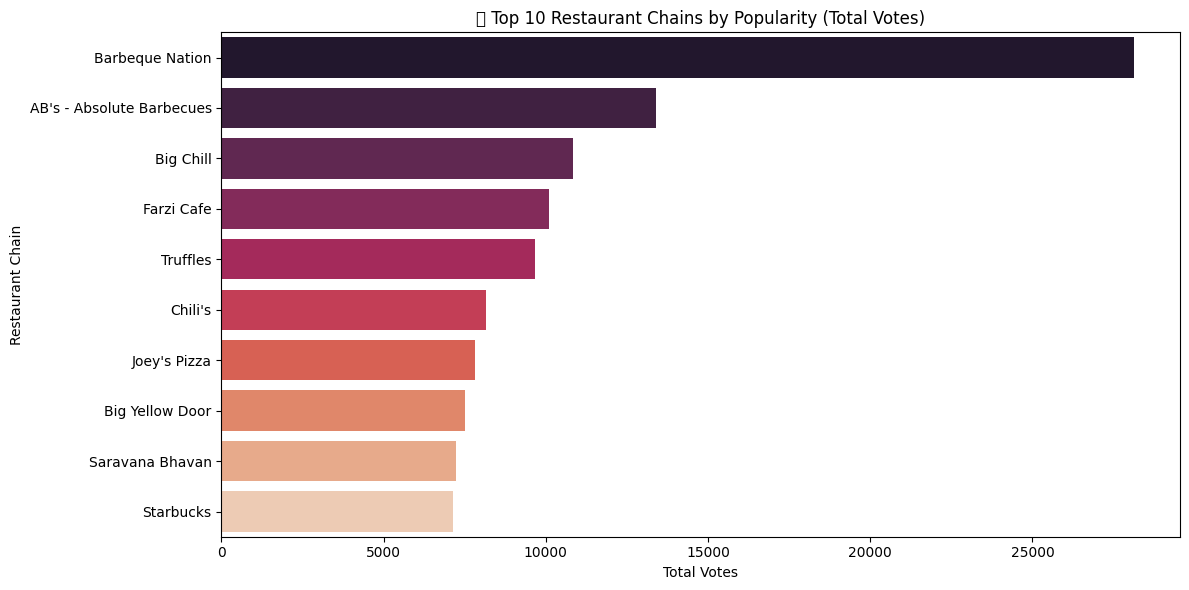

/tmp/ipython-input-13-1609638590.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains['Avg Rating'], y=top_chains.index, palette='crest')
/tmp/ipython-input-13-1609638590.py:44: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


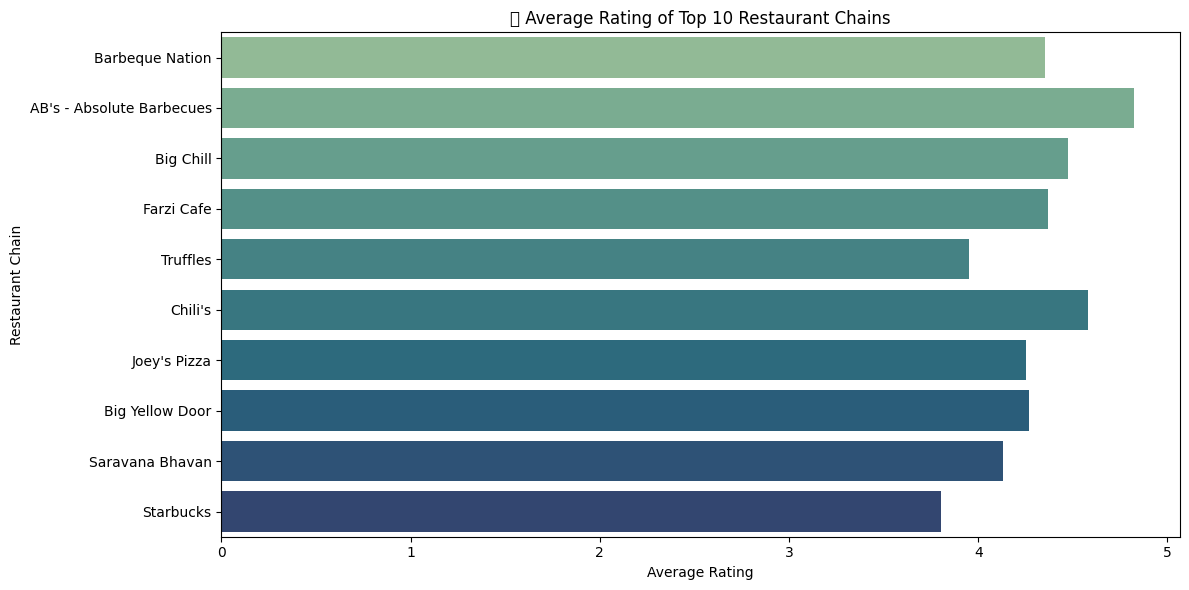

In [ ]:
#Task4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset .csv")

# Clean relevant columns
df['Restaurant Name'] = df['Restaurant Name'].astype(str)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Identify restaurant chains (names that appear more than once)
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1].index.tolist()

# Filter only restaurant chains
chain_df = df[df['Restaurant Name'].isin(restaurant_chains)]

# Group by restaurant name and calculate mean rating and total votes
chain_summary = chain_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={'Aggregate rating': 'Avg Rating', 'Votes': 'Total Votes', 'Restaurant ID': 'Outlets'})

# Sort by total votes to find most popular chains
top_chains = chain_summary.sort_values(by='Total Votes', ascending=False).head(10)

# Plot top 10 chains by popularity (votes)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_chains['Total Votes'], y=top_chains.index, palette='rocket')
plt.title('🔝 Top 10 Restaurant Chains by Popularity (Total Votes)')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Chain')
plt.tight_layout()
plt.show()

# Plot average rating of these top chains
plt.figure(figsize=(12, 6))
sns.barplot(x=top_chains['Avg Rating'], y=top_chains.index, palette='crest')
plt.title('⭐ Average Rating of Top 10 Restaurant Chains')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Chain')
plt.tight_layout()
plt.show()
